In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Load The Datasets

In [2]:
df_train=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
X_test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train.shape

(1460, 81)

In [4]:
X_test.shape

(1459, 80)

Notice that Train is extra by one column, that will be our target column

### Let's have a look at both the datasets

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Dropping the ID column in both of the datasets will be my first step.

In [7]:
df_train.drop(['Id'], axis =1 , inplace = True)

Before dropping ID from Test data let's just save it for later use.

In [8]:
test_ID = X_test['Id']

In [9]:
X_test.drop(['Id'], axis =1 , inplace = True)

##### Now, doing some statistical analysis for our target 'SalePrice' 

In [10]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The good thing here is that there are no 0 values

#### Visualize SalePrice

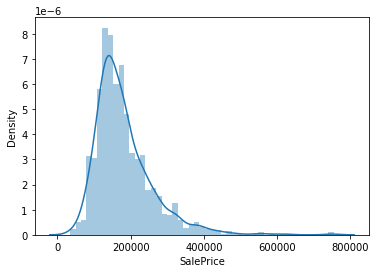

In [11]:
sns.distplot(df_train.SalePrice);

Notice that values are not normally distributed

In [12]:
#Doing log transform to normalize SalePrice
df_train.SalePrice=np.log(df_train.SalePrice)

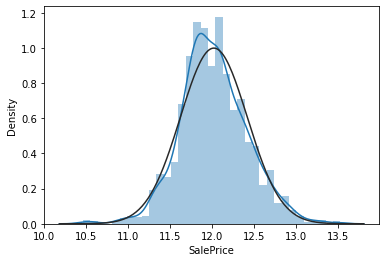

In [13]:
sns.distplot(df_train.SalePrice,fit=norm);

That's better

#### Checking missing values by percentage in both the datasets

In [14]:
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total Train', 'Percent Train'])
missing_data_train.head(20)

,Total Train,Percent Train
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [15]:
total_test = X_test.isnull().sum().sort_values(ascending=False)
percent_test = (X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total Test', 'Percent Test'])
missing_data_test.head(50)

,Total Test,Percent Test
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461
GarageQual,78,0.053461
GarageCond,78,0.053461


### Handling Missing Values

In [16]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'):
    df_train[col] = df_train[col].fillna('None')

for col in ('BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1','MasVnrArea','GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    df_train[col] = df_train[col].fillna(X_test[col].mode()[0])

df_train = df_train.drop(['Utilities'], axis=1)
df_train["Functional"] = df_train["Functional"].fillna("Typ")

In [17]:
X_test["LotFrontage"] = X_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'):
    X_test[col] = X_test[col].fillna('None')

for col in ('BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1','MasVnrArea','GarageYrBlt', 'GarageArea', 'GarageCars'):
    X_test[col] = X_test[col].fillna(0)

for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

X_test = X_test.drop(['Utilities'], axis=1)
X_test["Functional"] = X_test["Functional"].fillna("Typ")

#### After handling all the missing values let's have another look on the datasets

In [18]:
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total Train', 'Percent Train'])
missing_data_train.head(2)

,Total Train,Percent Train
MSSubClass,0,0.0
KitchenAbvGr,0,0.0


In [19]:
total_test = X_test.isnull().sum().sort_values(ascending=False)
percent_test = (X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total Test', 'Percent Test'])
missing_data_test.head(2)

,Total Test,Percent Test
MSSubClass,0,0.0
BedroomAbvGr,0,0.0


This is our new datasets after cleaning.

In [20]:
df_train.shape,X_test.shape

((1460, 79), (1459, 78))

Just to make sure

In [21]:
df_train.isnull().sum().max(),X_test.isnull().sum().max()

(0, 0)

### Correlation

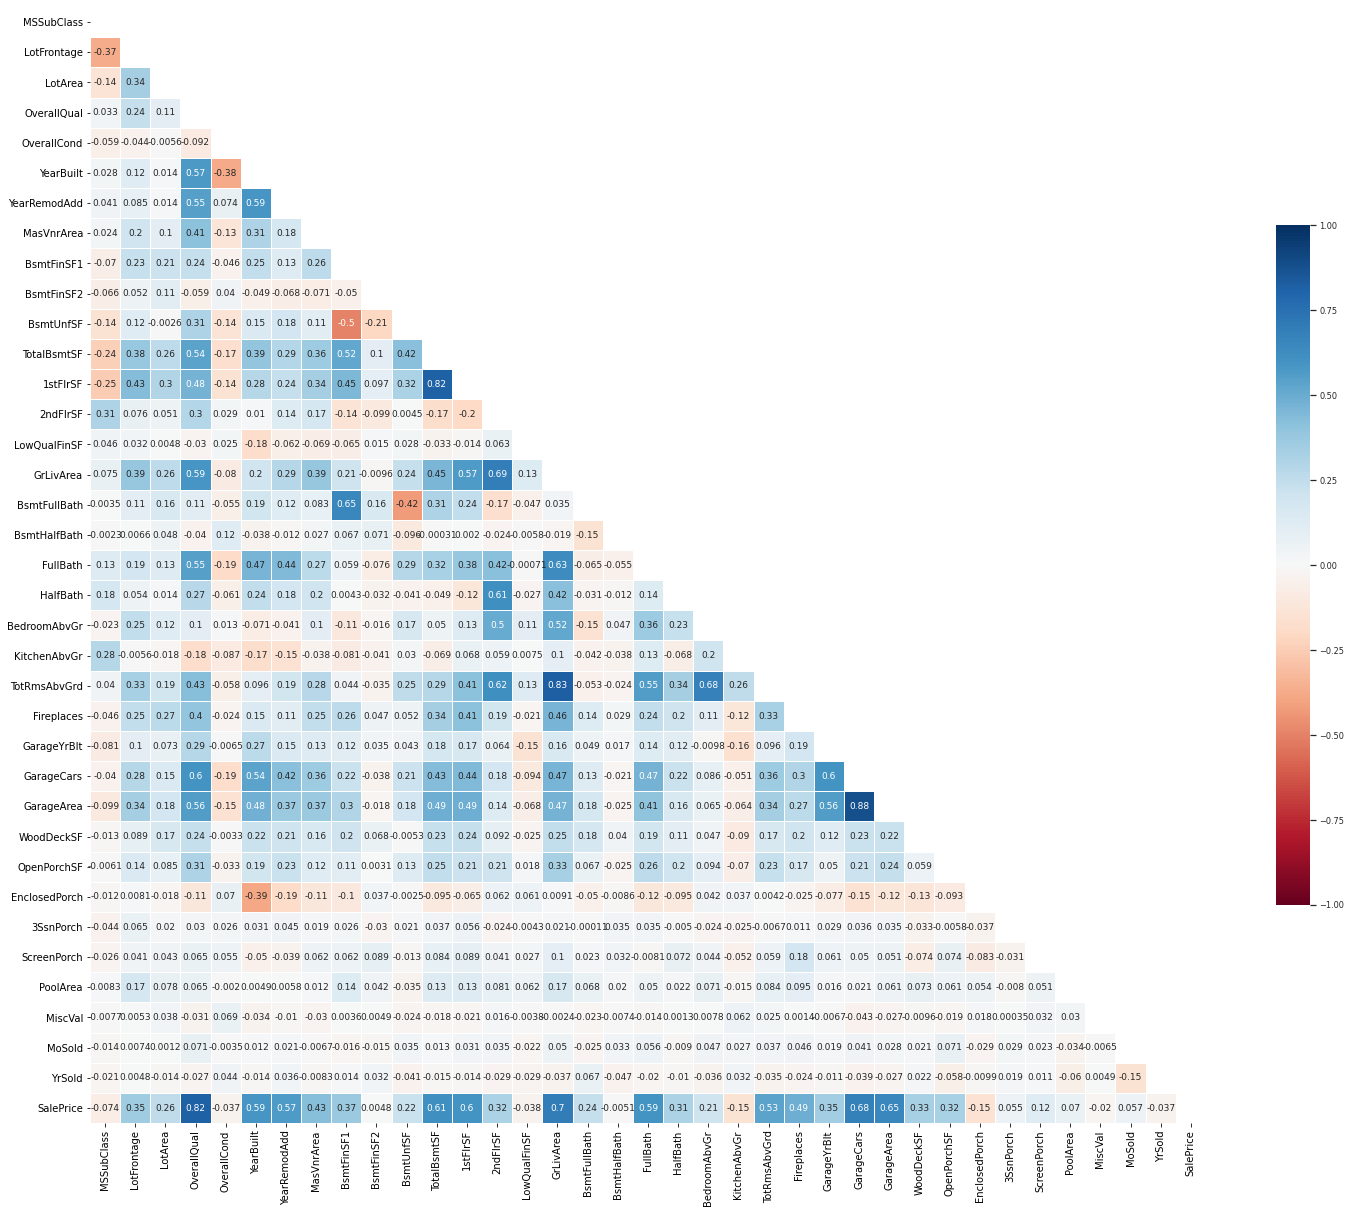

In [22]:
df_train_corr = df_train.corr()
f, ax = plt.subplots(figsize=(25, 25))
mask = np.triu(np.ones_like(df_train_corr, dtype=bool))
sns.set(font_scale=0.75)
ax = sns.heatmap(df_train_corr, vmin=-1, vmax=1, mask=mask, cmap='RdBu', center=0, annot = True, square=True, linewidths=.5, cbar_kws= {"shrink": .5, 'orientation': 'vertical'})

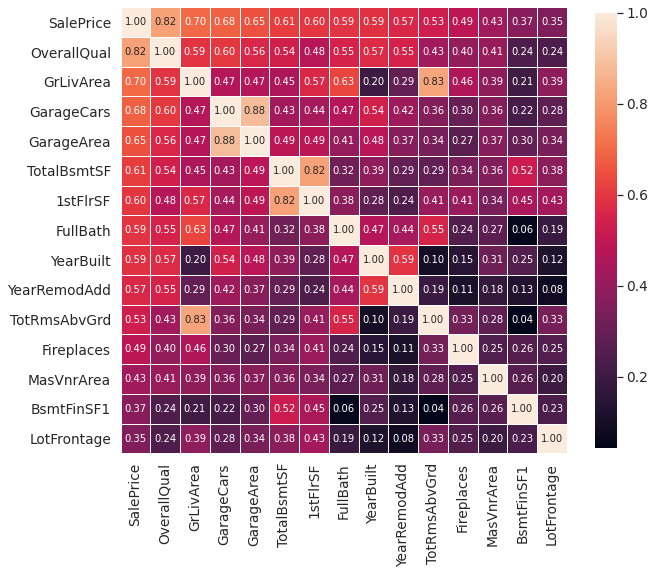

In [23]:
#saleprice correlation matrix
#number of variables for heatmap
k = 15
cols = df_train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.figure(figsize=(10, 16))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},cbar_kws= {"shrink": .5, 'orientation': 'vertical'}, yticklabels=cols.values,linewidths=.5, xticklabels=cols.values)
plt.show()

>##### What I noticed from these is that OverallQual is the highest correlated feature followed by GrLivArea and GarageCars

### Removing Outliers

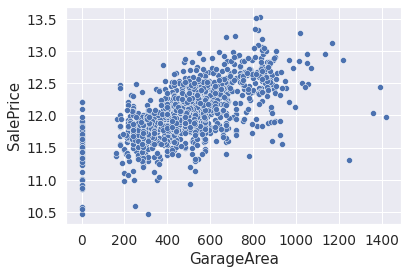

In [24]:
sns.scatterplot(x=df_train.GarageArea,y=df_train.SalePrice);

In [25]:
X=df_train[df_train['GarageArea']>1225]
X.GarageArea

581     1390
1061    1248
1190    1356
1298    1418
Name: GarageArea, dtype: int64

In [26]:
df_train.sort_values(by = 'GarageArea', ascending = False)[:4]
df_train = df_train.drop(df_train[df_train['GarageArea'] == 1390].index)
df_train = df_train.drop(df_train[df_train['GarageArea'] == 1248].index)
df_train = df_train.drop(df_train[df_train['GarageArea'] == 1356].index)
df_train = df_train.drop(df_train[df_train['GarageArea'] == 1418].index)

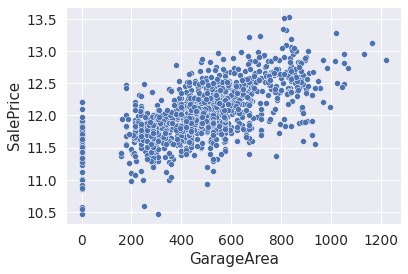

In [27]:
sns.scatterplot(x=df_train.GarageArea,y=df_train.SalePrice);

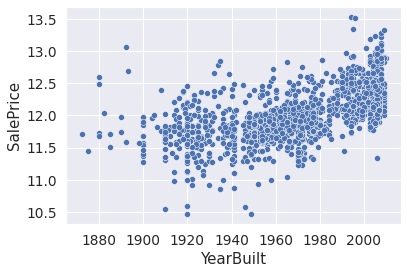

In [28]:
sns.scatterplot(x=df_train.YearBuilt,y=df_train.SalePrice);

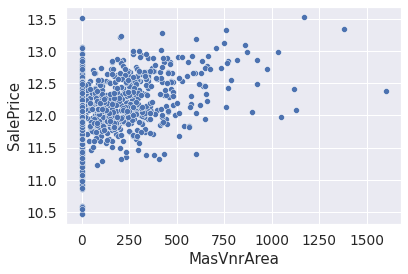

In [29]:
sns.scatterplot(x=df_train.MasVnrArea,y=df_train.SalePrice);

In [30]:
X=df_train[df_train['MasVnrArea']>1250]
X.MasVnrArea

297     1600.0
1169    1378.0
Name: MasVnrArea, dtype: float64

In [31]:
df_train.sort_values(by = 'MasVnrArea', ascending = False)[:1]
df_train = df_train.drop(df_train[df_train['MasVnrArea'] == 1600.0].index)

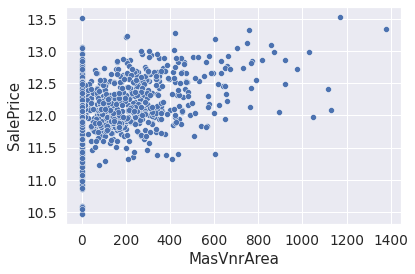

In [32]:
sns.scatterplot(x=df_train.MasVnrArea,y=df_train.SalePrice);

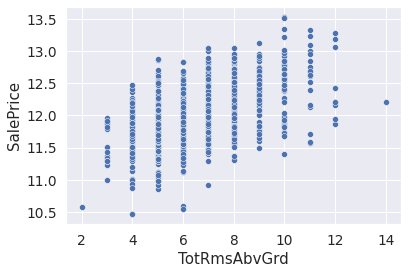

In [33]:
sns.scatterplot(x=df_train.TotRmsAbvGrd,y=df_train.SalePrice);

In [34]:
df_train.sort_values(by = 'TotRmsAbvGrd', ascending = False)[:1]
df_train = df_train.drop(df_train[df_train['TotRmsAbvGrd'] == 14].index)

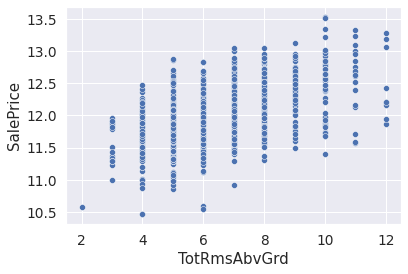

In [35]:
sns.scatterplot(x=df_train.TotRmsAbvGrd,y=df_train.SalePrice);

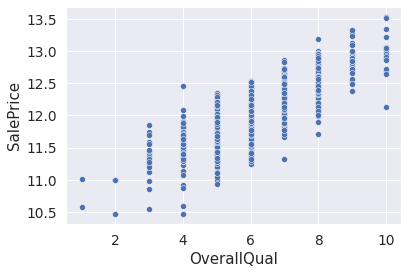

In [36]:
sns.scatterplot(x=df_train.OverallQual,y=df_train.SalePrice);

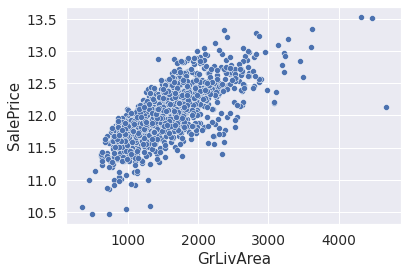

In [37]:
sns.scatterplot(x=df_train.GrLivArea,y=df_train.SalePrice);

In [38]:
X=df_train[df_train['GrLivArea']>4500]
X.GrLivArea

523    4676
Name: GrLivArea, dtype: int64

In [39]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:1]
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 4676].index)

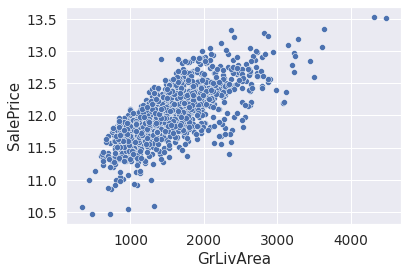

In [40]:
sns.scatterplot(x=df_train.GrLivArea,y=df_train.SalePrice);

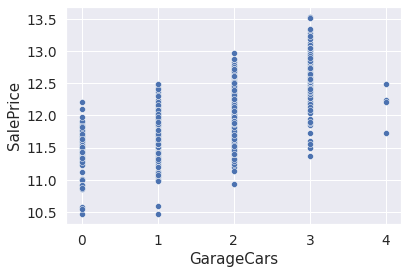

In [41]:
sns.scatterplot(x=df_train.GarageCars,y=df_train.SalePrice);

In [42]:
X=df_train[df_train['GarageCars']==4]
X.GarageCars

420     4
747     4
1340    4
1350    4
Name: GarageCars, dtype: int64

In [43]:
df_train.sort_values(by = 'GarageCars', ascending = False)[:1]
df_train = df_train.drop(df_train[df_train['GarageCars'] == 4].index)

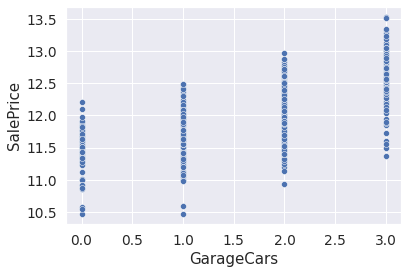

In [44]:
sns.scatterplot(x=df_train.GarageCars,y=df_train.SalePrice);

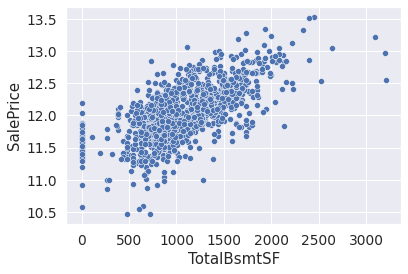

In [45]:
sns.scatterplot(x=df_train.TotalBsmtSF,y=df_train.SalePrice);

In [46]:
X=df_train[df_train['TotalBsmtSF']>3000]
X.TotalBsmtSF

332    3206
440    3094
496    3200
Name: TotalBsmtSF, dtype: int64

In [47]:
df_train.sort_values(by = 'TotalBsmtSF', ascending = False)[:3]
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] == 3206].index)
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] == 3094].index)
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] == 3200].index)

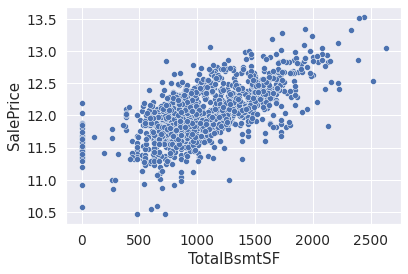

In [48]:
sns.scatterplot(x=df_train.TotalBsmtSF,y=df_train.SalePrice);

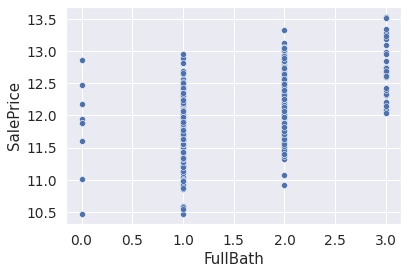

In [49]:
sns.scatterplot(x=df_train.FullBath,y=df_train.SalePrice);

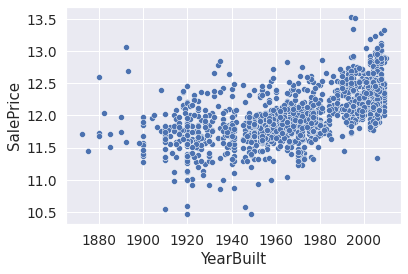

In [50]:
sns.scatterplot(x=df_train.YearBuilt,y=df_train.SalePrice);

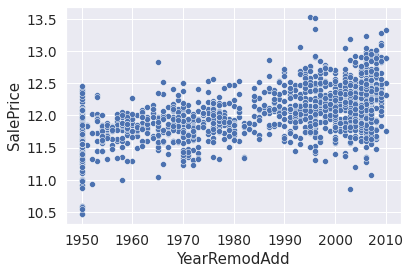

In [51]:
sns.scatterplot(x=df_train.YearRemodAdd,y=df_train.SalePrice);

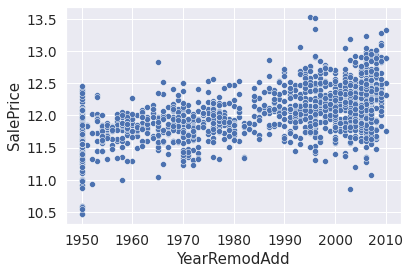

In [52]:
sns.scatterplot(x=df_train.YearRemodAdd,y=df_train.SalePrice);

### Normalizing some features

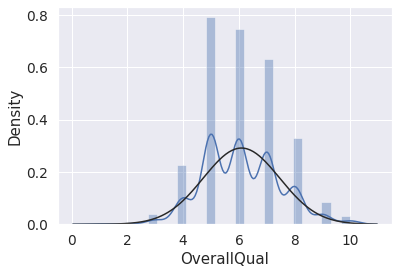

In [53]:
sns.distplot(df_train.OverallQual,fit=norm);

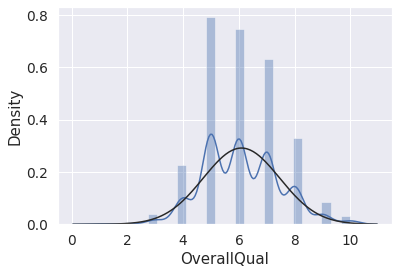

In [54]:
sns.distplot(df_train.OverallQual,fit=norm);

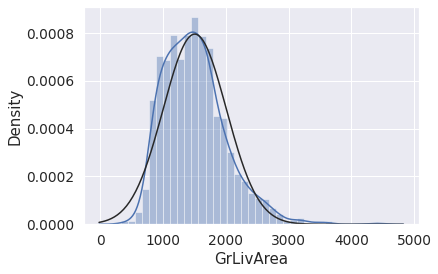

In [55]:
sns.distplot(df_train.GrLivArea,fit=norm);

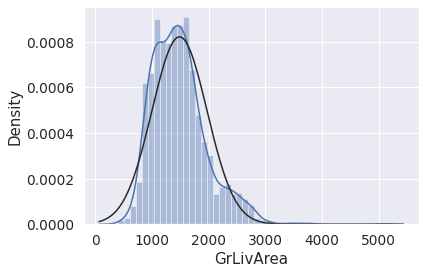

In [56]:
sns.distplot(X_test.GrLivArea,fit=norm);

In [57]:
df_train.GrLivArea=np.log(df_train.GrLivArea)

In [58]:
X_test.GrLivArea=np.log(X_test.GrLivArea)

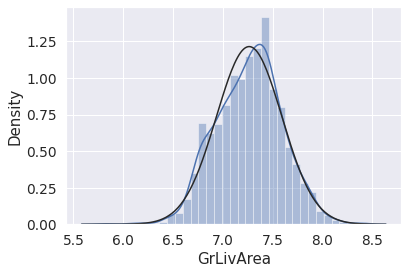

In [59]:
sns.distplot(df_train.GrLivArea,fit=norm);

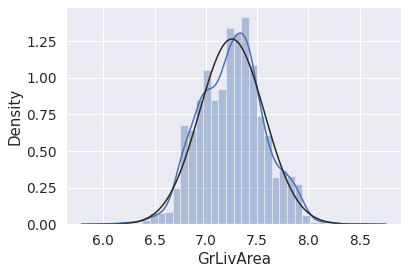

In [60]:
sns.distplot(X_test.GrLivArea,fit=norm);

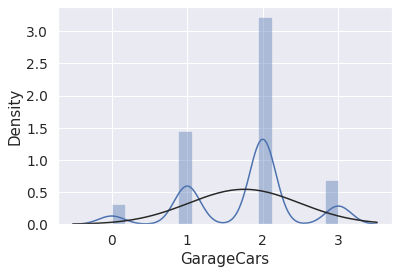

In [61]:
sns.distplot(df_train.GarageCars,fit=norm);

In [62]:
train_n = df_train.shape[0]
test_n = X_test.shape[0]
y_train = df_train.SalePrice.values
y_test = df_train['SalePrice']
df_train_test = pd.concat((df_train,X_test),sort=False).reset_index(drop = True)
df_train_test.drop(['SalePrice'], axis=1, inplace = True)
print("Train & Test size is : {}".format(df_train_test.shape))

Train & Test size is : (2905, 78)


In [63]:
df_train_test['MSSubClass'] = df_train_test['MSSubClass'].apply(str)

In [64]:
#Changing OverallCond ,Year and Month into a categorical variable
df_train_test['OverallCond'] = df_train_test['OverallCond'].astype(str)
df_train_test['YrSold'] = df_train_test['YrSold'].astype(str)
df_train_test['MoSold'] = df_train_test['MoSold'].astype(str)

In [65]:
df_train_test['TotalSF'] = df_train_test['TotalBsmtSF']+df_train_test['1stFlrSF']+df_train_test['2ndFlrSF']

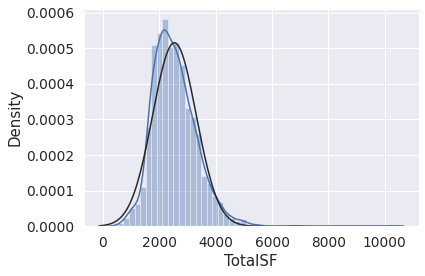

In [66]:
sns.distplot(df_train_test['TotalSF'],fit=norm);

In [67]:
df_train_test['TotalSF']=np.log(df_train_test['TotalSF'])

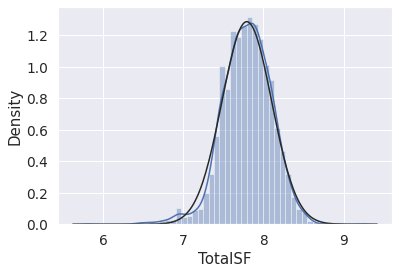

In [68]:
sns.distplot(df_train_test['TotalSF'],fit=norm);

In [69]:
df_train_test = pd.get_dummies(df_train_test)

In [70]:
df_train_test.shape

(2905, 338)

In [71]:
X_train = df_train_test[:train_n]
X_test = df_train_test[train_n:]
X_train.shape,X_test.shape

((1446, 338), (1459, 338))

In [72]:
from sklearn.model_selection import train_test_split

y_train.shape,X_train.shape,y_test.shape,X_test.shape

((1446,), (1446, 338), (1446,), (1459, 338))

In [73]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [74]:
X_train, Model_X_test, y_train, Model_y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [75]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)
y_predict_train_linear=LinearReg.predict(X_train)
y_predict_test_linear= LinearReg.predict(Model_X_test)

In [76]:
print("Accuracy on Traing set   : ",LinearReg.score(X_train,y_train))
print("Accuracy on Testing set  : ",LinearReg.score(Model_X_test,Model_y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Model_y_test, y_predict_test_linear))
print('Mean Squared Error       : ', metrics.mean_squared_error(Model_y_test, y_predict_test_linear))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(Model_y_test, y_predict_test_linear)))
print('R Squared Error          : ', metrics.r2_score(Model_y_test, y_predict_test_linear))
#0.1317634973408816

Accuracy on Traing set   :  0.9555845962600583
Accuracy on Testing set  :  0.8812292197286361
__________________________________________
		Error Table
Mean Absolute Error      :  0.08654657350853522
Mean Squared Error       :  0.018300904386100065
Root Mean Squared Error  :  0.1352808352506003
R Squared Error          :  0.8812292197286361


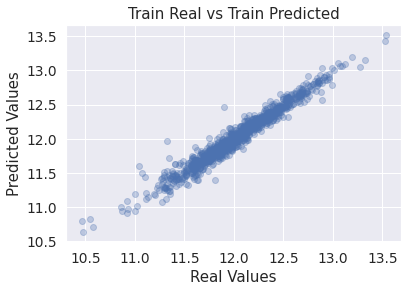

In [77]:
plt.scatter(y_train, y_predict_train_linear,alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Train Real vs Train Predicted');

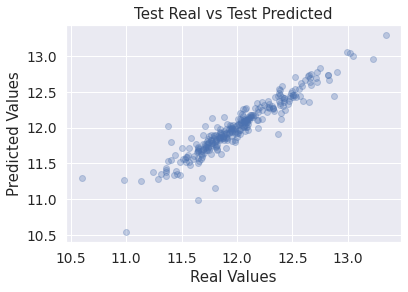

In [78]:
plt.scatter(Model_y_test, y_predict_test_linear,alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Test Real vs Test Predicted');

In [79]:
y_predict_test_linear = LinearReg.predict(X_test)
y_predict_test_linear = np.exp(y_predict_test_linear)
#Predictions = pd.DataFrame(y_predict_test_linear, index=test_ID, columns=["SalePrice"])
#Predictions.to_csv('submission_Linear.csv', header=True, index_label='Id')

In [80]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_predict_train_Random=RandomForest.predict(X_train)
y_predict_test_Random= RandomForest.predict(Model_X_test)

In [81]:
print("Accuracy on Traing set   : ",RandomForest.score(X_train,y_train))
print("Accuracy on Testing set  : ",RandomForest.score(Model_X_test,Model_y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Model_y_test, y_predict_test_Random))
print('Mean Squared Error       : ', metrics.mean_squared_error(Model_y_test, y_predict_test_Random))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(Model_y_test, y_predict_test_Random)))
print('R Squared Error          : ', metrics.r2_score(Model_y_test, y_predict_test_Random))
#0.14860810903452257

Accuracy on Traing set   :  0.9823355824143921
Accuracy on Testing set  :  0.8863672177761952
__________________________________________
		Error Table
Mean Absolute Error      :  0.09004598018776662
Mean Squared Error       :  0.01750921125425812
Root Mean Squared Error  :  0.13232237624173065
R Squared Error          :  0.8863672177761952


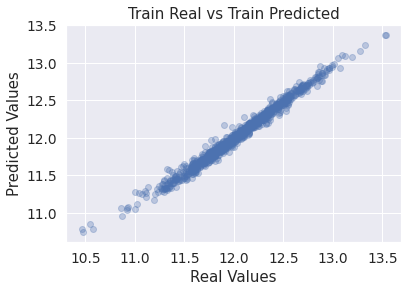

In [82]:
plt.scatter(y_train, y_predict_train_Random,alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Train Real vs Train Predicted');

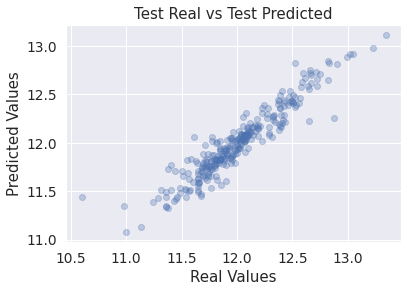

In [83]:
plt.scatter(Model_y_test, y_predict_test_Random,alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Test Real vs Test Predicted');

In [84]:
y_predict_test_Random = RandomForest.predict(X_test)
y_predict_test_Random = np.exp(y_predict_test_Random)
#Predictions = pd.DataFrame(y_predict_test_Random, index=test_ID, columns=["SalePrice"])
#Predictions.to_csv('submission_Random.csv', header=True, index_label='Id')

In [85]:
LGBMReg = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [86]:
LGBMReg.fit(X_train, y_train)
y_predict_train_LGB=LGBMReg.predict(X_train)
y_predict_test_LGB= LGBMReg.predict(Model_X_test)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [87]:
print("Accuracy on Traing set   : ",LGBMReg.score(X_train,y_train))
print("Accuracy on Testing set  : ",LGBMReg.score(Model_X_test,Model_y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Model_y_test, y_predict_test_LGB))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Model_y_test, y_predict_test_LGB))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(Model_y_test, y_predict_test_LGB)))
print('R Squared Error          : ', metrics.r2_score(Model_y_test, y_predict_test_LGB))
#0.12486785922887828

Accuracy on Traing set   :  0.9705702629119767
Accuracy on Testing set  :  0.9105617408649171
__________________________________________
		Error Table
Mean Absolute Error      :  0.0797862977469434
Mean Squared  Error      :  0.013781176019477837
Root Mean Squared Error  :  0.11739325372217024
R Squared Error          :  0.9105617408649171


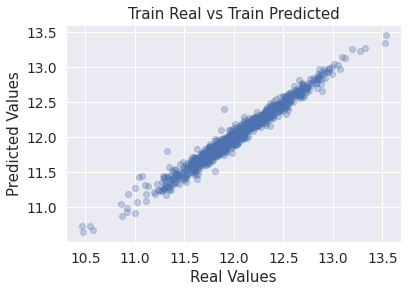

In [88]:
plt.scatter(y_train, y_predict_train_LGB,alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Train Real vs Train Predicted');

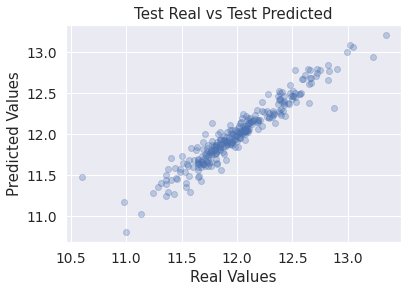

In [89]:
plt.scatter(Model_y_test, y_predict_test_LGB,alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Test Real vs Test Predicted');

In [90]:
y_predict_test_LGB = LGBMReg.predict(X_test)
y_predict_test_LGB = np.exp(y_predict_test_LGB)
#Predictions = pd.DataFrame(y_predict_test_LGB, index=test_ID, columns=["SalePrice"])
#Predictions.to_csv('submission_LGB.csv', header=True, index_label='Id')

In [91]:
XGB_model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=50000,
                             reg_alpha=0.4640, reg_lambda=0.6571,
                             subsample=0.5213,
                             random_state =5, nthread = -1)

In [92]:
XGB_model.fit(X_train, y_train)
y_predict_train_XGB=XGB_model.predict(X_train)
y_predict_test_XGB= XGB_model.predict(Model_X_test)

In [93]:
print("Accuracy on Traing set   : ",XGB_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",XGB_model.score(Model_X_test,Model_y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Model_y_test, y_predict_test_XGB))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Model_y_test, y_predict_test_XGB))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(Model_y_test, y_predict_test_XGB)))
print('R Squared Error          : ', metrics.r2_score(Model_y_test, y_predict_test_XGB))
#0.11325620609664265 <<< 0.12839 

Accuracy on Traing set   :  0.9683158466612118
Accuracy on Testing set  :  0.9167544405569459
__________________________________________
		Error Table
Mean Absolute Error      :  0.07856935206525445
Mean Squared  Error      :  0.012826968219405195
Root Mean Squared Error  :  0.11325620609664265
R Squared Error          :  0.9167544405569459


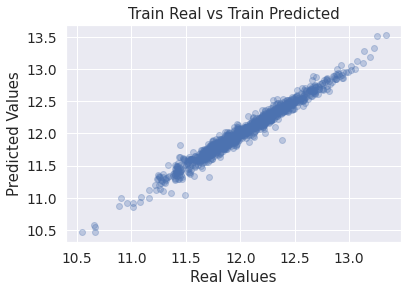

In [94]:
plt.scatter(y_predict_train_XGB, y_train, alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Train Real vs Train Predicted');

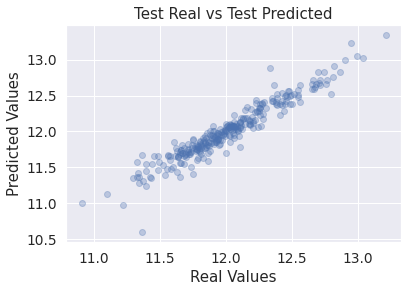

In [95]:
plt.scatter(y_predict_test_XGB, Model_y_test,alpha=0.3)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Test Real vs Test Predicted');

In [96]:
y_predict_test_XGB = XGB_model.predict(X_test)
y_predict_test_XGB = np.exp(y_predict_test_XGB)
Predictions = pd.DataFrame(y_predict_test_XGB, index=test_ID, columns=["SalePrice"])
Predictions.to_csv('submission_XGB_model.csv', header=True, index_label='Id')